In [115]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("D:\GitHub\QishiQR")
import Utils.MajorContract_Offsets
import importlib
importlib.reload(Utils.MajorContract_Offsets)
from Utils.MajorContract_Offsets import *

import Backtesting.Vectorized.lm_validation
importlib.reload(Backtesting.Vectorized.lm_validation)
from Backtesting.Vectorized.lm_validation import LmValidation

importlib.reload(Backtesting.Vectorized.Strategy)
from Backtesting.Vectorized.Strategy import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [8]:
10e-4

0.001

# bu

# 1 min, threshold = 2 is not good because almost all price changes are = 2

In [133]:
freq=1
offset = [0.1+i for i in range(freq)]

bu_train, bu_test, bu_probability_table = MajorContracts(symbol='bu', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'], 
                                                    '1609':['2016-2-1','2016-8-1'], 
                                                    '1612':['2016-6-1','2016-11-15'],
                                                    '1706':['2016-10-15','2017-1-31']}, 
                                       transitions={'1606':'2016-3-1', 
                                                    '1609':'2016-7-1', 
                                                    '1612':'2016-11-1', 
                                                    '1706':'2017-1-1' },
                                        freq = freq, offset = offset, threshold=0).create_major_overlap()

bu1606 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
bu1609 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301.0 20160630.0
bu1612 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1706 ['2016-10-15', '2017-1-31'] 2016-11-01 00:00:00 2016-12-31 00:00:00


In [134]:
threshold = 0
for offset in bu_test.keys():
    bu_test[offset].to_csv(r'../Output/bu_major_' + str(freq) + '_th' + str(threshold) + '_' + offset + '.csv')
for contract in ['1606', '1609', '1612']:
    bu_probability_table[contract].to_csv(r'../Strategy/bu_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(threshold) + '.csv', index=False)

In [135]:
#bu
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "bu_*_major_strategy_"+str(freq)+"_th"+str(threshold)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/bu_major_strategy_'+str(freq)+'_th'+str(threshold)+'.csv')
print(slm.head())

bu_1606_major_strategy_1_th0.csv
bu_1609_major_strategy_1_th0.csv
bu_1612_major_strategy_1_th0.csv
   prior      0      1      2  total signal
0      p  56712  13952  14356  85020      0
1     p0  46045   5257   5409  56711      0
2    p00  41380   2290   2374  46044      0
3   p000  39208   1104   1067  41379      0
4  p0000  38175    496    536  39207      0


bu_major_1_th2_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:52: RuntimeWarning: invalid value encountered in double_scalars
  sharpe = (average_daily_return * 250) / vol


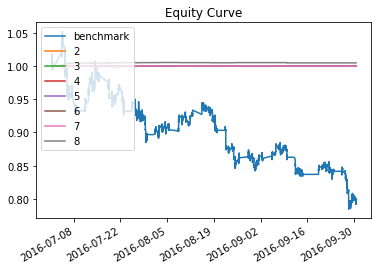

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000          0.000000e+00                      NaN   
1               0.000000          0.000000e+00                      NaN   
2               0.000000          0.000000e+00                      NaN   
3               0.000000          0.000000e+00                      NaN   
4               0.003053          7.385334e-06                -0.000405   
5               0.007051          6.708079e-07                -0.000477   
6               0.006682          7.471052e-05                -0.000349   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN              0.000000e+00              0.000000   
1                      NaN              0.000000e+00              0.000000   
2                      NaN              0.000000e+00              0.000000   
3                      NaN              0.000000e+00              0.000000   
4        

In [132]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, symbol='bu_major_'+str(freq)+'_'+'th'+str(threshold), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, px_th=threshold)
lm_validation.run()

# freq 5min

In [137]:
freq=5
offset = [0.1+i for i in range(5)]

bu_train, bu_test, bu_probability_table = MajorContracts(symbol='bu', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'], 
                                                    '1609':['2016-2-1','2016-8-1'], 
                                                    '1612':['2016-6-1','2016-11-15'],
                                                    '1706':['2016-10-15','2017-1-31']}, 
                                       transitions={'1606':'2016-3-1', 
                                                    '1609':'2016-7-1', 
                                                    '1612':'2016-11-1', 
                                                    '1706':'2017-1-1' },
                                        freq = freq, offset = offset, threshold=0).create_major_overlap()

bu1606 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104 20160229
bu1609 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301.0 20160630.0
probability table:  20160301 20160630
probability table:  20160301 20160630
probability table:  20160301 20160630
probability table:  20160301 20160630
bu1612 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_

In [138]:
threshold = 0
for offset in bu_test.keys():
    bu_test[offset].to_csv(r'../Output/bu_major_' + str(freq) + '_th' + str(threshold) + '_' + offset + '.csv')
for contract in ['1606', '1609', '1612']:
    bu_probability_table[contract].to_csv(r'../Strategy/bu_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(threshold) + '.csv', index=False)

In [139]:
#bu
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "bu_*_major_strategy_"+str(freq)+"_th"+str(threshold)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/bu_major_strategy_'+str(freq)+'_th'+str(threshold)+'.csv')
print(slm.head())

bu_1606_major_strategy_5_th0.csv
bu_1609_major_strategy_5_th0.csv
bu_1612_major_strategy_5_th0.csv
   prior      0      1      2  total signal
0      p  48665  17716  18639  85020      0
1     p0  40257   4123   4279  48659      0
2    p00  37857   1118   1276  40251      0
3   p000  37051    372    428  37851      0
4  p0000  36679    164    203  37046      0


bu_major_5_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


bu_major_5_th0_1.1.csv
bu_major_5_th0_2.1.csv
bu_major_5_th0_3.1.csv
bu_major_5_th0_4.1.csv


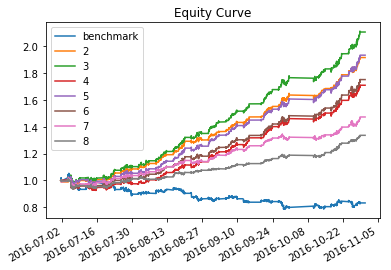

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.223798              0.008258                -0.002696   
1               0.230096              0.009462                -0.002816   
2               0.256041              0.006819                -0.003192   
3               0.245447              0.008379                -0.002926   
4               0.263256              0.007128                -0.003042   
5               0.250194              0.004930                -0.002923   
6               0.255943              0.003693                -0.002607   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001828                  0.000204             -0.032218   
1                 0.001796                  0.000315             -0.032218   
2                 0.001781                  0.000282             -0.027434   
3                 0.001781                  0.000294             -0.028542   
4        

In [143]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, start='2016-7-1',end='2016-10-31', symbol='bu_major_'+str(freq)+'_'+'th'+str(threshold), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, px_th=threshold)
lm_validation.run()

bu_major_5_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


bu_major_5_th0_1.1.csv
bu_major_5_th0_2.1.csv
bu_major_5_th0_3.1.csv
bu_major_5_th0_4.1.csv


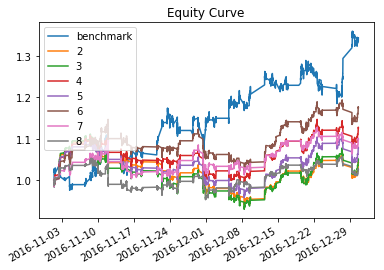

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.368745              0.001023                -0.004040   
1               0.394991              0.001186                -0.004256   
2               0.376832              0.002825                -0.004659   
3               0.376195              0.001808                -0.004354   
4               0.379008              0.003814                -0.004512   
5               0.376275              0.002257                -0.004398   
6               0.387558              0.000658                -0.003899   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002262                  0.000027             -0.042088   
1                 0.002214                  0.000040             -0.045502   
2                 0.002316                  0.000116             -0.048069   
3                 0.002218                  0.000064             -0.048069   
4        

In [146]:
lm_validation = LmValidation(slm_th, start='2016-11-1',end='2016-12-31',symbol='bu_major_'+str(freq)+'_'+'th'+str(threshold), 
                             data_dir=r'../Output', valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

In [69]:
freq=5
offset = [0.1+i for i in range(5)]

bu_train, bu_test, bu_probability_table = MajorContracts(symbol='bu', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'], 
                                                    '1609':['2016-2-1','2016-8-1'], 
                                                    '1612':['2016-6-1','2016-11-15'],
                                                    '1706':['2016-10-15','2017-1-31']}, 
                                       transitions={'1606':'2016-3-1', 
                                                    '1609':'2016-7-1', 
                                                    '1612':'2016-11-1', 
                                                    '1706':'2017-1-1' },
                                        freq = freq, offset = offset, threshold=2).create_major_overlap()

bu1606 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104 20160229
bu1609 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301.0 20160630.0
probability table:  20160301 20160630
probability table:  20160301 20160630
probability table:  20160301 20160630
probability table:  20160301 20160630
bu1612 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1612 ['2016-6-1', '2016-11-15'] 2016-07-01 00:00:00 2016-11-01 00:00:00
bu1706 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_

In [82]:
threshold = 2
for offset in bu_test.keys():
    bu_test[offset].to_csv(r'../Output/bu_major_' + str(freq) + '_th' + str(threshold) + '_' + offset + '.csv')
for contract in ['1606', '1609', '1612']:
    bu_probability_table[contract].to_csv(r'../Strategy/bu_'+ contract + '_major_strategy_' + str(freq) + '_th' + str(threshold) + '.csv', index=False)

In [83]:
#bu
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "bu_*_major_strategy_"+str(freq)+"_th"+str(threshold)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/bu_major_strategy_'+str(freq)+'_th'+str(threshold)+'.csv')
print(slm.head())

bu_1606_major_strategy_5_th2.csv
bu_1609_major_strategy_5_th2.csv
bu_1612_major_strategy_5_th2.csv
   prior      0     1     2  total signal
0      p  66413  9033  9574  85020      0
1     p0  56403  4886  5115  66404      0
2    p00  50402  2908  3084  56394      0
3   p000  46497  1912  1984  50393      0
4  p0000  43819  1310  1360  46489      0


bu_major_5_th2_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:52: RuntimeWarning: invalid value encountered in double_scalars
  sharpe = (average_daily_return * 250) / vol


bu_major_5_th2_1.1.csv
bu_major_5_th2_2.1.csv
bu_major_5_th2_3.1.csv
bu_major_5_th2_4.1.csv


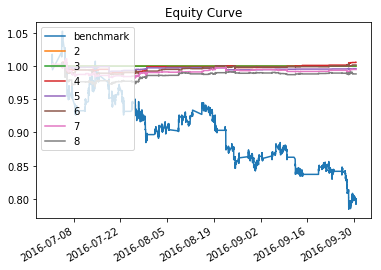

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.000000              0.000000                      NaN   
2               0.055218              0.000089                -0.004255   
3               0.037932             -0.000060                -0.005413   
4               0.060720              0.000027                -0.003411   
5               0.065057             -0.000077                -0.003284   
6               0.095653             -0.000183                -0.002907   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                 0.003041                  0.000096             -0.017203   
3                 0.002156                 -0.000123             -0.017772   
4        

In [84]:
slm_th = SLM(slm, 0, th_type=0).run()

lm_validation = LmValidation(slm_th, symbol='bu_major_'+str(freq)+'_'+'th'+str(threshold), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5, px_th=threshold)
lm_validation.run()

# freq 15mins

In [85]:
freq=15
offset = [0.1+i for i in range(freq)]

bu_train, bu_test, bu_probability_table = MajorContracts(symbol='bu', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'], 
                                                    '1609':['2016-2-1','2016-8-1'], 
                                                    '1612':['2016-6-1','2016-11-15'],
                                                    '1706':['2016-10-15','2017-1-31']}, 
                                       transitions={'1606':'2016-3-1', 
                                                    '1609':'2016-7-1', 
                                                    '1612':'2016-11-1', 
                                                    '1706':'2017-1-1' },
                                        freq = freq, offset = offset, threshold=2).create_major_overlap()

bu1606 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
bu1609 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301.0 20160630.0
probability table:  2016030

In [86]:
threshold = 2
for offset in bu_test.keys():
    bu_test[offset].to_csv(r'../Output/bu_major_' + str(freq) + '_th' + str(threshold) + '_' + offset + '.csv')
for contract in ['1606', '1609', '1612']:
    bu_probability_table[contract].to_csv(r'../Strategy/bu_'+ contract + '_major_strategy_' + str(freq) +  '_th' + str(threshold) + '.csv', index=False)

In [87]:
#bu
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "bu_*_major_strategy_"+str(freq)+"_th"+str(threshold)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/bu_major_strategy_'+str(freq)+'_th'+str(threshold)+'.csv')
print(slm.head())

bu_1606_major_strategy_15_th2.csv
bu_1609_major_strategy_15_th2.csv
bu_1612_major_strategy_15_th2.csv
   prior      0      1      2  total signal
0      p  57548  13141  14331  85020      0
1     p0  46482   5442   5598  57522      0
2    p00  41364   2465   2638  46467      0
3   p000  38667   1253   1429  41349      0
4  p0000  37076    769    811  38656      0


In [88]:
slm_th = SLM(slm, 0, th_type=0).run()
slm_th

,prior,0,1,2,total,signal,max,max_pct,min,min_pct,threshold,order
0,p,57548,13141,14331,85020,0,0,0.676876,1,0.154564,0.508316,1
1,p0,46482,5442,5598,57522,0,0,0.808073,1,0.094607,0.710754,2
2,p1,5025,3463,4653,13141,0,0,0.382391,1,0.263526,0.028308,2
3,p2,6012,4236,4079,14327,0,0,0.419627,2,0.284707,0.123962,2
4,p22,1576,1355,1145,4076,0,0,0.386654,2,0.280913,0.054220,3
5,p01,2173,1351,1918,5442,0,0,0.399302,1,0.248254,0.046858,3
6,p20,2842,1616,1543,6001,0,0,0.473588,2,0.257124,0.204299,3
7,p12,1976,1329,1348,4653,0,0,0.424672,1,0.285622,0.134967,3
8,p11,1171,1042,1250,3463,2,2,0.360959,1,0.300895,0.022813,3
9,p00,41364,2465,2638,46467,0,0,0.890180,1,0.053048,0.833409,3


bu_major_15_th2_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:52: RuntimeWarning: invalid value encountered in double_scalars
  sharpe = (average_daily_return * 250) / vol


bu_major_15_th2_1.1.csv
bu_major_15_th2_10.1.csv
bu_major_15_th2_11.1.csv
bu_major_15_th2_12.1.csv
bu_major_15_th2_13.1.csv
bu_major_15_th2_14.1.csv
bu_major_15_th2_2.1.csv
bu_major_15_th2_3.1.csv
bu_major_15_th2_4.1.csv
bu_major_15_th2_5.1.csv
bu_major_15_th2_6.1.csv
bu_major_15_th2_7.1.csv
bu_major_15_th2_8.1.csv
bu_major_15_th2_9.1.csv


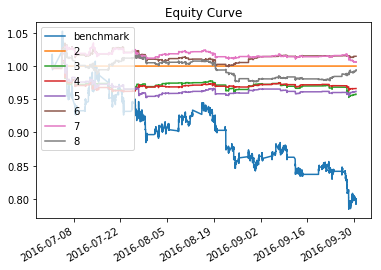

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.103145             -0.000676                -0.005528   
2               0.111288             -0.000536                -0.005428   
3               0.133301             -0.000605                -0.005438   
4               0.121162              0.000231                -0.004333   
5               0.141720              0.000094                -0.003805   
6               0.156357             -0.000084                -0.003653   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                 0.003114                 -0.000324             -0.022611   
2                 0.003008                 -0.000236             -0.025657   
3                 0.003361                 -0.000211             -0.029471   
4        

In [89]:
lm_validation = LmValidation(slm_th, symbol='bu_major_'+str(freq)+'_'+'th'+str(threshold), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=15, px_th=threshold)
lm_validation.run()

# threshold = 0

In [90]:
freq=15
offset = [0.1+i for i in range(freq)]

bu_train, bu_test, bu_probability_table = MajorContracts(symbol='bu', split_time = '2016-7-1', topdir=r'..\\Data',
                                          maturity={'1606':['2015-11-1','2016-5-1'], 
                                                    '1609':['2016-2-1','2016-8-1'], 
                                                    '1612':['2016-6-1','2016-11-15'],
                                                    '1706':['2016-10-15','2017-1-31']}, 
                                       transitions={'1606':'2016-3-1', 
                                                    '1609':'2016-7-1', 
                                                    '1612':'2016-11-1', 
                                                    '1706':'2017-1-1' },
                                        freq = freq, offset = offset, threshold=0).create_major_overlap()

bu1606 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1606 ['2015-11-1', '2016-5-1'] 2016-01-01 00:00:00 2016-03-01 00:00:00
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104.0 20160229.0
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
probability table:  20160104 20160229
bu1609 ..\\Data/bu
Parallel mode on.
Parallel mode on.
ID trade_range transition_begin transition_end
1609 ['2016-2-1', '2016-8-1'] 2016-03-01 00:00:00 2016-07-01 00:00:00
probability table:  20160301.0 20160630.0
probability table:  2016030

In [91]:
threshold = 0
for offset in bu_test.keys():
    bu_test[offset].to_csv(r'../Output/bu_major_' + str(freq) + '_th' + str(threshold) + '_' + offset + '.csv')
for contract in ['1606', '1609', '1612']:
    bu_probability_table[contract].to_csv(r'../Strategy/bu_'+ contract + '_major_strategy_' + str(freq) +  '_th' + str(threshold) + '.csv', index=False)

In [92]:
#bu
filepath = "../Strategy"
#fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "bu_*_major_strategy_"+str(freq)+"_th"+str(threshold)+".csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('../Strategy/bu_major_strategy_'+str(freq)+'_th'+str(threshold)+'.csv')
print(slm.head())

bu_1606_major_strategy_15_th0.csv
bu_1609_major_strategy_15_th0.csv
bu_1612_major_strategy_15_th0.csv
   prior      0      1      2  total signal
0      p  44285  19655  21080  85020      0
1     p0  37827   3221   3218  44266      0
2    p00  36293    741    778  37812      0
3   p000  35639    297    342  36278      0
4  p0000  35153    209    271  35633      0


In [93]:
slm_th = SLM(slm, 0, th_type=0).run()
slm_th

,prior,0,1,2,total,signal,max,max_pct,min,min_pct,threshold,order
0,p,44285,19655,21080,85020,0,0,0.520877,1,0.231181,0.272936,1
1,p0,37827,3221,3218,44266,0,0,0.854538,2,0.072697,0.781774,2
2,p1,3037,7311,9306,19654,2,2,0.473491,0,0.154523,0.101506,2
3,p2,3401,9123,8546,21070,1,1,0.432985,0,0.161414,0.027385,2
4,p22,1243,3916,3378,8537,1,1,0.458709,0,0.145601,0.063020,3
5,p01,556,1124,1541,3221,2,2,0.478423,0,0.172617,0.129463,3
6,p20,835,1358,1204,3397,1,1,0.399764,0,0.245805,0.045334,3
7,p12,1565,3893,3848,9306,1,1,0.418332,0,0.168171,0.004836,3
8,p11,991,2800,3520,7311,2,2,0.481466,0,0.135549,0.098482,3
9,p00,36293,741,778,37812,0,0,0.959828,1,0.019597,0.939252,3


bu_major_15_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


bu_major_15_th0_1.1.csv
bu_major_15_th0_10.1.csv
bu_major_15_th0_11.1.csv
bu_major_15_th0_12.1.csv
bu_major_15_th0_13.1.csv
bu_major_15_th0_14.1.csv
bu_major_15_th0_2.1.csv
bu_major_15_th0_3.1.csv
bu_major_15_th0_4.1.csv
bu_major_15_th0_5.1.csv
bu_major_15_th0_6.1.csv
bu_major_15_th0_7.1.csv
bu_major_15_th0_8.1.csv
bu_major_15_th0_9.1.csv


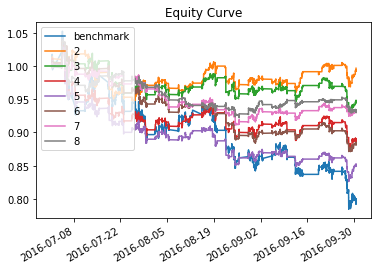

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.225286             -0.000044                -0.004658   
1               0.232883             -0.000822                -0.004799   
2               0.261764             -0.001820                -0.005856   
3               0.263556             -0.002484                -0.005240   
4               0.250983             -0.001926                -0.004566   
5               0.249864             -0.001108                -0.004469   
6               0.249338             -0.001117                -0.004084   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002716                 -0.000004             -0.036226   
1                 0.002763                 -0.000084             -0.036891   
2                 0.002823                 -0.000209             -0.046174   
3                 0.003016                 -0.000287             -0.047294   
4        

In [94]:
lm_validation = LmValidation(slm_th, symbol='bu_major_'+str(freq)+'_'+'th'+str(threshold), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=15, px_th=threshold)
lm_validation.run()

bu_major_15_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:52: RuntimeWarning: invalid value encountered in double_scalars
  sharpe = (average_daily_return * 250) / vol


bu_major_15_th0_1.1.csv
bu_major_15_th0_10.1.csv
bu_major_15_th0_11.1.csv
bu_major_15_th0_12.1.csv
bu_major_15_th0_13.1.csv
bu_major_15_th0_14.1.csv
bu_major_15_th0_2.1.csv
bu_major_15_th0_3.1.csv
bu_major_15_th0_4.1.csv
bu_major_15_th0_5.1.csv
bu_major_15_th0_6.1.csv
bu_major_15_th0_7.1.csv
bu_major_15_th0_8.1.csv
bu_major_15_th0_9.1.csv


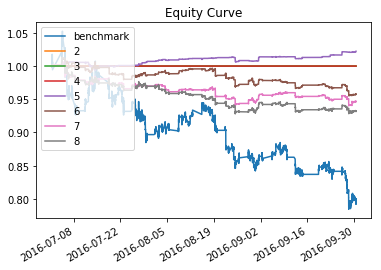

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.000000              0.000000                      NaN   
2               0.000000              0.000000                      NaN   
3               0.047898              0.000345                -0.003684   
4               0.113982             -0.000670                -0.004290   
5               0.124804             -0.000854                -0.003790   
6               0.151388             -0.001098                -0.003669   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                      NaN                  0.000000              0.000000   
3                 0.003163                  0.000284             -0.011214   
4        

In [104]:
slm_th = SLM(slm, 0.52, th_type=1).run()
lm_validation = LmValidation(slm_th, symbol='bu_major_'+str(freq)+'_'+'th'+str(threshold), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=15, px_th=threshold)
lm_validation.run()

bu_major_15_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:52: RuntimeWarning: invalid value encountered in double_scalars
  sharpe = (average_daily_return * 250) / vol


bu_major_15_th0_1.1.csv
bu_major_15_th0_10.1.csv
bu_major_15_th0_11.1.csv
bu_major_15_th0_12.1.csv
bu_major_15_th0_13.1.csv
bu_major_15_th0_14.1.csv
bu_major_15_th0_2.1.csv
bu_major_15_th0_3.1.csv
bu_major_15_th0_4.1.csv
bu_major_15_th0_5.1.csv
bu_major_15_th0_6.1.csv
bu_major_15_th0_7.1.csv
bu_major_15_th0_8.1.csv
bu_major_15_th0_9.1.csv


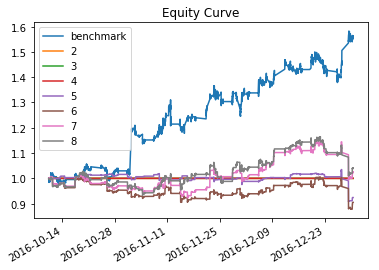

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.000000              0.000000                      NaN   
2               0.000000              0.000000                      NaN   
3               0.306225             -0.001320                -0.021665   
4               0.457631             -0.001659                -0.017862   
5               0.552436              0.000457                -0.016137   
6               0.612965              0.000711                -0.014052   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                      NaN                  0.000000              0.000000   
3                 0.011303                 -0.000863             -0.139150   
4        

In [105]:
lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31',symbol='bu_major_'+str(freq)+'_'+'th'+str(threshold), 
                             data_dir=r'../Output', valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

bu_major_15_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:52: RuntimeWarning: invalid value encountered in double_scalars
  sharpe = (average_daily_return * 250) / vol


bu_major_15_th0_1.1.csv
bu_major_15_th0_10.1.csv
bu_major_15_th0_11.1.csv
bu_major_15_th0_12.1.csv
bu_major_15_th0_13.1.csv
bu_major_15_th0_14.1.csv
bu_major_15_th0_2.1.csv
bu_major_15_th0_3.1.csv
bu_major_15_th0_4.1.csv
bu_major_15_th0_5.1.csv
bu_major_15_th0_6.1.csv
bu_major_15_th0_7.1.csv
bu_major_15_th0_8.1.csv
bu_major_15_th0_9.1.csv


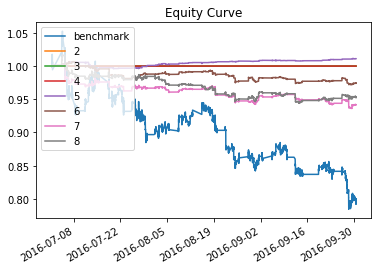

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.000000              0.000000                      NaN   
2               0.000000              0.000000                      NaN   
3               0.037343              0.000173                -0.003638   
4               0.087798             -0.000401                -0.004001   
5               0.120345             -0.000935                -0.003678   
6               0.148395             -0.000756                -0.003570   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                      NaN                  0.000000              0.000000   
3                 0.002765                  0.000191             -0.009823   
4        

In [106]:
slm_th = SLM(slm, 0.2, th_type=2).run()
lm_validation = LmValidation(slm_th, symbol='bu_major_'+str(freq)+'_'+'th'+str(threshold), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=15, px_th=threshold)
lm_validation.run()

bu_major_15_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:52: RuntimeWarning: invalid value encountered in double_scalars
  sharpe = (average_daily_return * 250) / vol


bu_major_15_th0_1.1.csv
bu_major_15_th0_10.1.csv
bu_major_15_th0_11.1.csv
bu_major_15_th0_12.1.csv
bu_major_15_th0_13.1.csv
bu_major_15_th0_14.1.csv
bu_major_15_th0_2.1.csv
bu_major_15_th0_3.1.csv
bu_major_15_th0_4.1.csv
bu_major_15_th0_5.1.csv
bu_major_15_th0_6.1.csv
bu_major_15_th0_7.1.csv
bu_major_15_th0_8.1.csv
bu_major_15_th0_9.1.csv


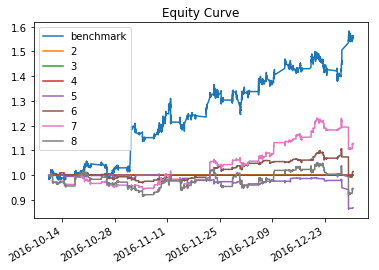

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.000000              0.000000                      NaN   
1               0.000000              0.000000                      NaN   
2               0.000000              0.000000                      NaN   
3               0.294912             -0.002384                -0.025609   
4               0.349612              0.000269                -0.015959   
5               0.488447              0.002057                -0.014575   
6               0.597052             -0.000900                -0.014208   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                      NaN                  0.000000              0.000000   
1                      NaN                  0.000000              0.000000   
2                      NaN                  0.000000              0.000000   
3                 0.010056                 -0.001907             -0.139150   
4        

In [107]:
lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31',symbol='bu_major_'+str(freq)+'_'+'th'+str(threshold), 
                             data_dir=r'../Output', valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

3
bu_major_15_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


bu_major_15_th0_1.1.csv
bu_major_15_th0_10.1.csv
bu_major_15_th0_11.1.csv
bu_major_15_th0_12.1.csv
bu_major_15_th0_13.1.csv
bu_major_15_th0_14.1.csv
bu_major_15_th0_2.1.csv
bu_major_15_th0_3.1.csv
bu_major_15_th0_4.1.csv
bu_major_15_th0_5.1.csv
bu_major_15_th0_6.1.csv
bu_major_15_th0_7.1.csv
bu_major_15_th0_8.1.csv
bu_major_15_th0_9.1.csv


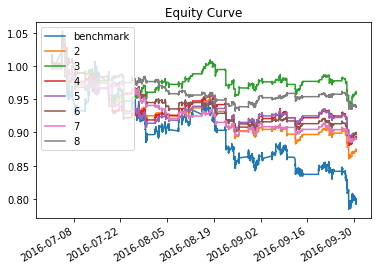

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.202881             -0.002086                -0.005493   
1               0.213449             -0.000604                -0.005144   
2               0.214485             -0.001751                -0.005161   
3               0.216508             -0.001642                -0.004809   
4               0.205729             -0.001669                -0.004284   
5               0.231271             -0.001821                -0.004125   
6               0.224121             -0.000985                -0.003842   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002733                 -0.000208             -0.034845   
1                 0.002725                 -0.000049             -0.035318   
2                 0.002675                 -0.000150             -0.035496   
3                 0.002739                 -0.000138             -0.034741   
4        

In [122]:
slm_th = SLM(slm, 0.05, th_type=3).run()
lm_validation = LmValidation(slm_th, symbol='bu_major_'+str(freq)+'_'+'th'+str(threshold), data_dir=r'../Output',
                                 valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=15, px_th=threshold)
lm_validation.run()

bu_major_15_th0_0.1.csv


C:\Users\Administrator\AppData\Local\Programs\Python\Python36-32\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:/GitHub/QishiQR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


bu_major_15_th0_1.1.csv
bu_major_15_th0_10.1.csv
bu_major_15_th0_11.1.csv
bu_major_15_th0_12.1.csv
bu_major_15_th0_13.1.csv
bu_major_15_th0_14.1.csv
bu_major_15_th0_2.1.csv
bu_major_15_th0_3.1.csv
bu_major_15_th0_4.1.csv
bu_major_15_th0_5.1.csv
bu_major_15_th0_6.1.csv
bu_major_15_th0_7.1.csv
bu_major_15_th0_8.1.csv
bu_major_15_th0_9.1.csv


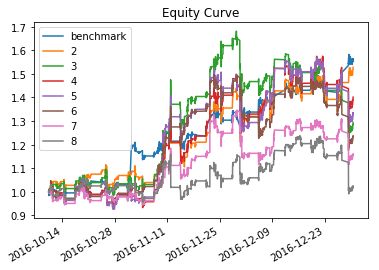

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.622448              0.007247                -0.017561   
1               0.881602              0.004470                -0.019500   
2               0.805398              0.005815                -0.018417   
3               0.916718              0.005016                -0.018922   
4               0.842511              0.003720                -0.017517   
5               0.929659              0.002632                -0.017098   
6               0.958403              0.000524                -0.015544   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.011499                  0.000693             -0.106490   
1                 0.011422                  0.000336             -0.181632   
2                 0.011638                  0.000463             -0.161178   
3                 0.011712                  0.000394             -0.179438   
4        

In [124]:
lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31',symbol='bu_major_'+str(freq)+'_'+'th'+str(threshold), 
                             data_dir=r'../Output', valid_dir=r'../Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()